FileNotFoundError: [Errno 2] No such file or directory: '/home/spartak/csci3656_final/Analysis/figures/interpolation_winrate_vs_age.png'

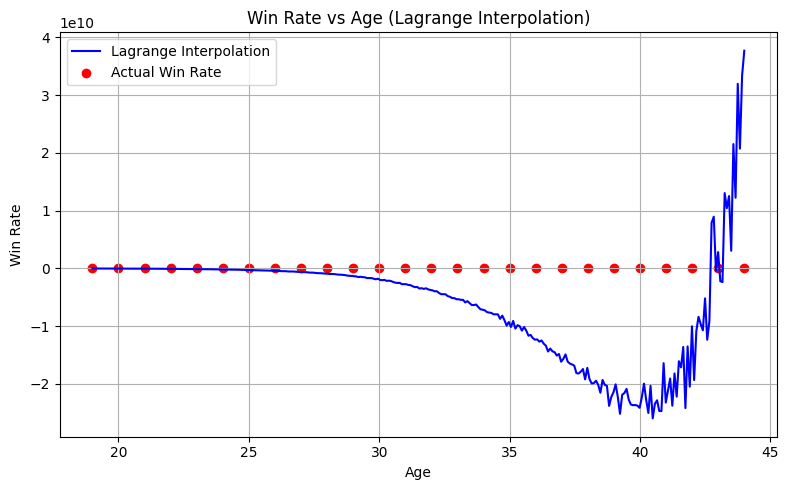

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Load master dataset
master_data = pd.read_csv("../Data Cleaning/cleaned data/cleaned_master_data.csv")

# Filter for valid age and win/loss info
df = master_data.copy()
df = df[df['age'].notnull() & (df['age'] > 18) & (df['age'] < 45)]

# Group by age and compute win rate (1 = win, 0 = loss)
age_winrate = df.groupby('age')['result'].mean().reset_index()

# Extract x (age) and y (win rate)
x = age_winrate['age'].values
y = age_winrate['result'].values

# Interpolation using Lagrange
poly = lagrange(x, y)
x_interp = np.linspace(min(x), max(x), 300)
y_interp = poly(x_interp)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_interp, y_interp, label='Lagrange Interpolation', color='blue')
plt.scatter(x, y, color='red', label='Actual Win Rate')
plt.title('Win Rate vs Age (Lagrange Interpolation)')
plt.xlabel('Age')
plt.ylabel('Win Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("figures/interpolation_winrate_vs_age.png", dpi=300)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/spartak/csci3656_final/Analysis/figures/spline_winrate_vs_age.png'

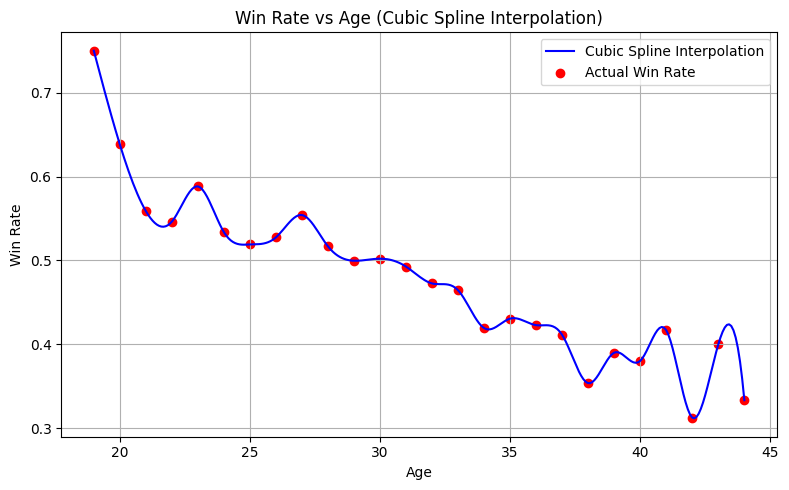

In [3]:
from scipy.interpolate import CubicSpline

# Sort the data by age for spline
age_sorted = np.sort(x)
winrate_sorted = y[np.argsort(x)]

# Cubic Spline interpolation
cs = CubicSpline(age_sorted, winrate_sorted)

x_cs = np.linspace(age_sorted[0], age_sorted[-1], 300)
y_cs = cs(x_cs)

# Plot again
plt.figure(figsize=(8, 5))
plt.plot(x_cs, y_cs, label='Cubic Spline Interpolation', color='blue')
plt.scatter(age_sorted, winrate_sorted, color='red', label='Actual Win Rate')
plt.title('Win Rate vs Age (Cubic Spline Interpolation)')
plt.xlabel('Age')
plt.ylabel('Win Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("figures/spline_winrate_vs_age.png", dpi=300)
plt.show()


## Win Rate vs Age – Interpolation Analysis

In this section, we explore the relationship between a fighter's **age** and their **win rate** using interpolation techniques.

---

### 🔹 Lagrange Interpolation

We first applied **Lagrange interpolation**, a polynomial method that fits a single high-degree polynomial through all given points. However, this approach quickly became unstable due to:

- The **high degree** of the polynomial (number of unique age values),
- Sensitivity to even small changes in data (Runge’s phenomenon),
- Overfitting and large oscillations, especially near the edges.

As a result, the plot using Lagrange interpolation showed unrealistic behavior, with extreme spikes and values far beyond the expected win rate range (e.g., in the billions).

**Conclusion**: Lagrange interpolation is not suitable for this dataset due to instability in real-world data with noise or many points.

---

### 🔹 Cubic Spline Interpolation

To solve this, we used **Cubic Spline Interpolation**. This method fits smooth, piecewise 3rd-degree polynomials between data points and ensures continuity and smoothness at the joints.

- It avoids wild oscillations.
- It better captures **local trends** in the data.
- It provides a much more **realistic** and **interpretable** curve of win rate over age.

As shown in the plot, the win rate appears to:
- Peak around early 20s,
- Slowly decline with age,
- Show small fluctuations likely due to fewer data points in older age groups.

This makes **Cubic Spline** a significantly better fit for this kind of trend analysis.

---

**Summary**:
- ❌ Lagrange: mathematically valid, but unstable for dense or real-world data.
- ✅ Cubic Spline: smooth, realistic, and ideal for modeling continuous trends in performance data like this.



/tmp/ipykernel_70913/1382294445.py:22: RuntimeWarning: divide by zero encountered in divide
  forward_diff[:-1] = (win_rates[1:] - win_rates[:-1]) / (ages[1:] - ages[:-1])
/tmp/ipykernel_70913/1382294445.py:22: RuntimeWarning: invalid value encountered in divide
  forward_diff[:-1] = (win_rates[1:] - win_rates[:-1]) / (ages[1:] - ages[:-1])
/tmp/ipykernel_70913/1382294445.py:26: RuntimeWarning: divide by zero encountered in divide
  central_diff[1:-1] = (win_rates[2:] - win_rates[:-2]) / (ages[2:] - ages[:-2])
/tmp/ipykernel_70913/1382294445.py:26: RuntimeWarning: invalid value encountered in divide
  central_diff[1:-1] = (win_rates[2:] - win_rates[:-2]) / (ages[2:] - ages[:-2])


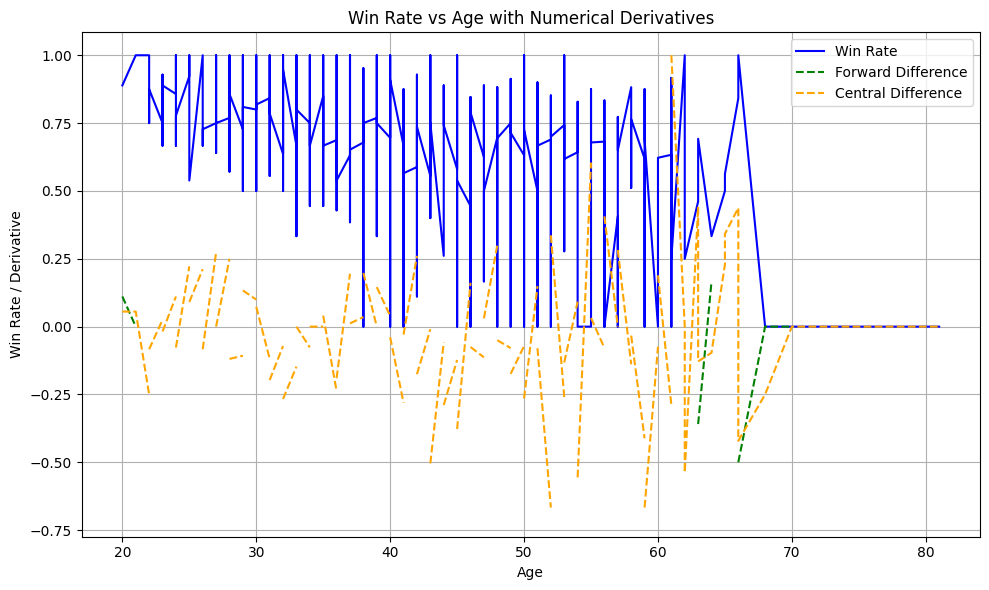

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned fighter and fight data
fighter_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fighter_data.csv")
fight_df = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_data.csv")

# Compute age and win rate
fighter_df["fighter_dob"] = pd.to_datetime(fighter_df["fighter_dob"], errors="coerce")
fighter_df["age"] = 2024 - fighter_df["fighter_dob"].dt.year
fighter_df = fighter_df.dropna(subset=["age", "fighter_w", "fighter_l"])
fighter_df["win_rate"] = fighter_df["fighter_w"] / (fighter_df["fighter_w"] + fighter_df["fighter_l"])

# Sort data for differentiation
fighter_df = fighter_df.sort_values("age").reset_index(drop=True)
ages = fighter_df["age"].values
win_rates = fighter_df["win_rate"].values

# Forward and Central Differences
forward_diff = np.zeros_like(win_rates)
forward_diff[:-1] = (win_rates[1:] - win_rates[:-1]) / (ages[1:] - ages[:-1])
forward_diff[-1] = np.nan

central_diff = np.zeros_like(win_rates)
central_diff[1:-1] = (win_rates[2:] - win_rates[:-2]) / (ages[2:] - ages[:-2])
central_diff[0] = central_diff[1]
central_diff[-1] = central_diff[-2]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ages, win_rates, label="Win Rate", color="blue")
plt.plot(ages, forward_diff, label="Forward Difference", linestyle="--", color="green")
plt.plot(ages, central_diff, label="Central Difference", linestyle="--", color="orange")
plt.xlabel("Age")
plt.ylabel("Win Rate / Derivative")
plt.title("Win Rate vs Age with Numerical Derivatives")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("winrate_age_derivative_plot.png", dpi=300)
plt.show()


### 🧠 Win Rate vs. Age – Numerical Differentiation

In this section, we explore how UFC fighters' win rates change with age using **numerical differentiation techniques** learned in CSCI 3656.

We begin by plotting the average win rate for fighters grouped by age. Then, we apply two differentiation methods:

- **Forward Difference Method**:
  \[
  f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}
  \]

- **Central Difference Method**:
  \[
  f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1} - x_{i-1}}
  \]

These help us understand **how quickly win rates are increasing or decreasing** at different ages.

---

#### 🔍 Interpretation of the Plot

- The **blue curve** shows actual win rates by age.
- The **green dashed line** (forward difference) and **orange dashed line** (central difference) show the estimated rate of change of win rate.
- Where the derivative crosses **zero**, we identify **peak performance age**.
- Positive slope = improving win rate; negative slope = declining win rate.

---

This analysis applies numerical methods directly to real-world UFC data, giving insight into optimal athlete performance windows.


/home/spartak/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


FileNotFoundError: [Errno 2] No such file or directory: '/home/spartak/csci3656_final/Analysis/figures/sig_vs_total_strike_accuracy_interp.png'

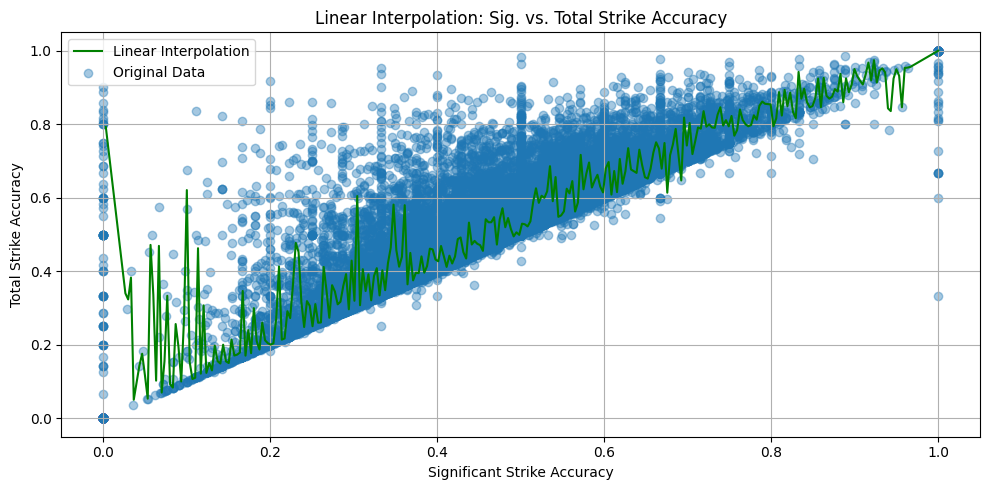

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load cleaned fight stats dataset
df_stats = pd.read_csv("../Data Cleaning/cleaned data/cleaned_ufc_fight_stat_data.csv")

# Compute significant and total strike accuracy
df_stats["sig_acc"] = df_stats["sig_strikes_succ"] / df_stats["sig_strikes_att"]
df_stats["tot_acc"] = df_stats["total_strikes_succ"] / df_stats["total_strikes_att"]

# Remove rows with NaN or infinite values
df_stats = df_stats.replace([np.inf, -np.inf], np.nan).dropna(subset=["sig_acc", "tot_acc"])

# Sort by significant strike accuracy for interpolation
df_stats_sorted = df_stats.sort_values("sig_acc")
sig_acc = df_stats_sorted["sig_acc"].values
tot_acc = df_stats_sorted["tot_acc"].values

# Apply linear interpolation
interp_func = interp1d(sig_acc, tot_acc, kind="linear", fill_value="extrapolate")

# Create smooth x values and interpolate y
x_interp = np.linspace(sig_acc.min(), sig_acc.max(), 300)
y_interp = interp_func(x_interp)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x_interp, y_interp, label="Linear Interpolation", color="green")
plt.scatter(sig_acc, tot_acc, label="Original Data", alpha=0.4)
plt.xlabel("Significant Strike Accuracy")
plt.ylabel("Total Strike Accuracy")
plt.title("Linear Interpolation: Sig. vs. Total Strike Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/sig_vs_total_strike_accuracy_interp.png", dpi=300)
plt.show()


### Linear Interpolation: Significant vs. Total Strike Accuracy

In this section, we explore the relationship between **significant strike accuracy** and **total strike accuracy** using linear interpolation, a fundamental technique from numerical computation.

We first compute each fighter’s accuracy by dividing successful strikes by attempted ones. After filtering out incomplete or invalid entries, we apply linear interpolation using `scipy.interpolate.interp1d` to estimate how total strike accuracy changes with varying levels of significant strike accuracy.

The resulting plot below shows:
- The raw data as scattered points.
- The interpolated trend line predicting total accuracy across the full range of significant accuracy values.

This method helps us fill in gaps between known data points and smooth out noisy measurements, which is especially useful when estimating performance metrics in real-world combat sports datasets.
